# Telco Churn Feature Engineering

In [131]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from datetime import date
from sklearn.neighbors import LocalOutlierFactor
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# FEATURE DESCRIPTIONS

* CustomerId : Müşteri İd’si
* Gender : Cinsiyet
* SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
* Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır)
* Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır
* tenure : Müşterinin şirkette kaldığı ay sayısı
* PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
* MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
* InternetService Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
* OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* Contract Müşterinin : sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
* PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
* PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
* MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
* TotalCharges : Müşteriden tahsil edilen toplam tutar
* Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

In [132]:
data=pd.read_csv("datasets//Telco-Customer-Churn.csv")
df=data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [133]:
def df_check(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### Tail #####################")
    print(dataframe.tail(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Describe #####################")
    print(dataframe.describe())
    
df_check(df)

##################### Shape #####################
(7043, 21)
##################### Types #####################
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##################### Head #####################
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes  

In [134]:
# statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [136]:
import researchpy as rp

num_cols = df.select_dtypes(include = np.number).columns
rp.summary_cont(df[num_cols]) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SeniorCitizen,7043.00,0.16,0.37,0.00,0.15,0.17
1,tenure,7043.00,32.37,24.56,0.29,31.80,32.94
2,MonthlyCharges,7043.00,64.76,30.09,0.36,64.06,65.46


In [137]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customerID[object],1. 7590-VHVEG2. 3791-LGQCY3. 6008-NAIXK4. 5956-YHHRX5. 5365-LLFYV6. 5855-EIBDE7. 8166-ZZTFS8. 0129-KPTWJ9. 9128-CPXKI10. 9509-MPYOD11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)7,033 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,gender[object],1. Male2. Female,"3,555 (50.5%)3,488 (49.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bwYnDMBRF0a8gwmQjYQwuxkVMsSlC3RhjLZKQjWYxDcR/8YTIPRV8zMWQ4BdaawYoBDO7mdm19yEDerfWnr2PGEmc5/k3pTT1PmQ0tdY9hHAnuM/FlNK0rusz5/zqfcwojuP4KaVM27ZdzYzYPhTNzHLOr2VZHr2PGcyt9wGjufQ+AN+D2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGmWj2/zFg70NGwvPyibXWvZQyGR8DnlJr3c3s3fuOkTB48WPwclJgygcV3mw+vNUcmPI5MOPzYcp3EjM+P6Z8Pvxyd+BPXcgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggw5TvJJ6VH1M+B2Z8PgxefBi8OPwBCltq31np+ZoAAAAASUVORK5CYII="">",0(0.0%)
3,SeniorCitizen[int64],Mean (sd) : 0.2 (0.4)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.4),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtklEQVR4nO3ZTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL14U0XPOBvx1H+8+AHCP6tYN7t6aWV24/5RzXgtngS9XQ3X3tu/7XQihK1m+LMvB3ffEimfdeqLWIYRuHMc1xrg9sjil1EzT1M3zXJsZoeIpN1/9ZmYxxm0YhmPB/rZgBviGjylIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIqN59APwf7t6aWV04fso5rz9dJFS8hLu3fd/vQghdyfyyLAd33/8UK6HiVeoQQjeO4xpj3B4ZTCk10zR18zzXZkao+H0xxm0YhmPBaHvtIh9TkECokECokECokECokECokECokECokECokHDXn6mUUvPo4pRScz6fKzML7v7wwSAnXC6XqrSVW/d8AkonTn3BAu6AAAAAAElFTkSuQmCC"">",0(0.0%)
4,Partner[object],1. No2. Yes,"3,641 (51.7%)3,402 (48.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABOUlEQVR4nO3bwYnDMBRF0a9BhMlGwhhcjIuYYqcIdWOMtUhCNspiCog1gidE7qngYy6GBD9XSjFAwZnZ1cwuvQ8Z2LOUcu99xAj8PM8/IYSp9yGjyjnvzrlfgnvPhxCmdV3vMcZH72NGcxzHd0pp2rbtYmbE9oY3M4sxPpZlufU+ZlDX3geM4qv3AfgcxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yHizv48Aex8yIp5bHZ9z3lNKk/ER4L/knHcze/a+YwQMXtoxeDnJMeWDCm+2OrzFGjDlq8Bsrw1TvpOY7bVjyleHX+wN+FMXMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgw5TuJZ9SOKV8FZnttGLzUY

In [138]:
# checking categorical and numeric variables
def grab_col_names(dataframe,cat_th=10,car_th=20):

    
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and 
                dataframe[col].dtypes!="O"]
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>car_th and 
                dataframe[col].dtypes=="O"]
    cat_cols=cat_cols+num_but_cat
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    
    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes!="O"]
    num_cols=[col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    
    
    return cat_cols,num_cols


cat_cols,num_cols=grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2


        gender  Ratio
Male      3555  50.48
Female    3488  49.52
##########################################


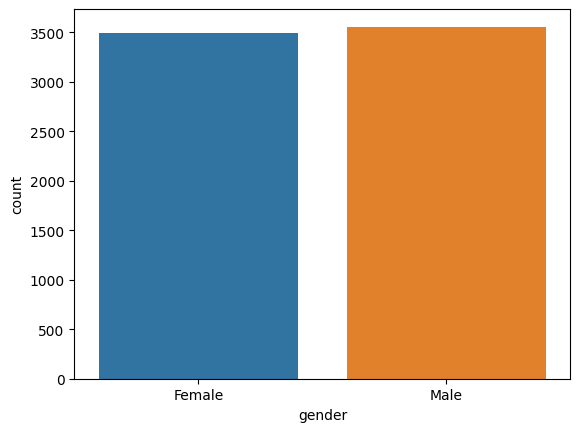

##########################################
     Partner  Ratio
No      3641  51.70
Yes     3402  48.30
##########################################


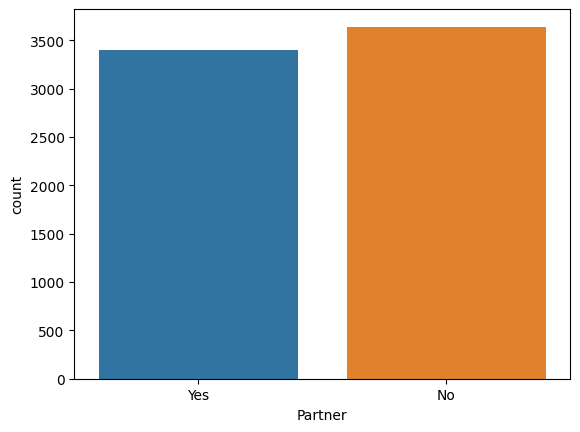

##########################################
     Dependents  Ratio
No         4933  70.04
Yes        2110  29.96
##########################################


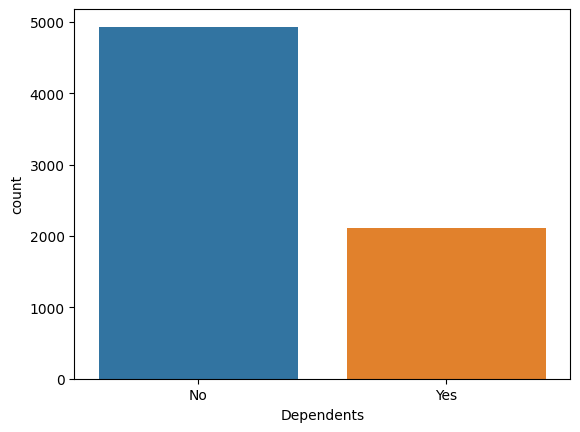

##########################################
     PhoneService  Ratio
Yes          6361  90.32
No            682   9.68
##########################################


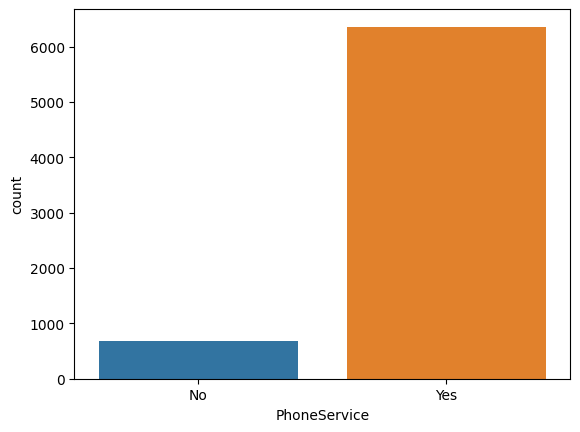

##########################################
                  MultipleLines  Ratio
No                         3390  48.13
Yes                        2971  42.18
No phone service            682   9.68
##########################################


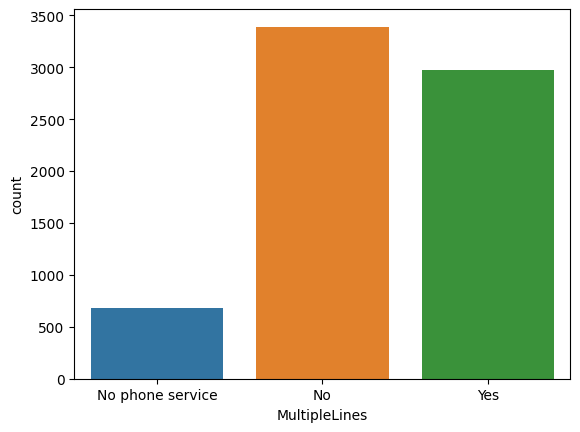

##########################################
             InternetService  Ratio
Fiber optic             3096  43.96
DSL                     2421  34.37
No                      1526  21.67
##########################################


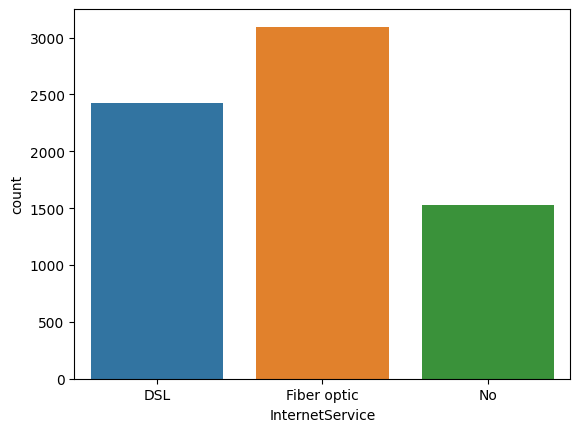

##########################################
                     OnlineSecurity  Ratio
No                             3498  49.67
Yes                            2019  28.67
No internet service            1526  21.67
##########################################


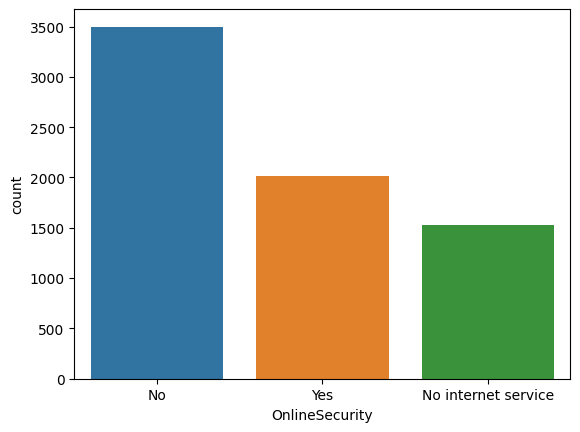

##########################################
                     OnlineBackup  Ratio
No                           3088  43.84
Yes                          2429  34.49
No internet service          1526  21.67
##########################################


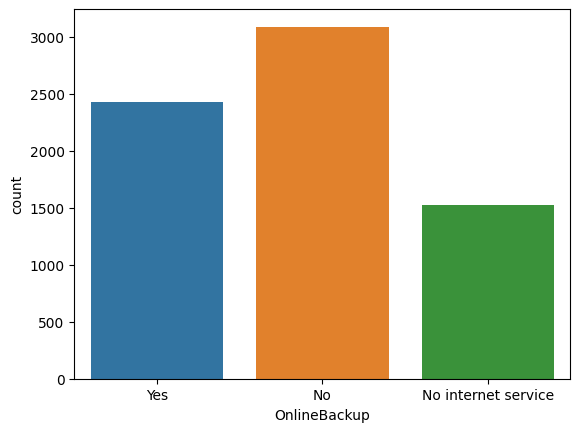

##########################################
                     DeviceProtection  Ratio
No                               3095  43.94
Yes                              2422  34.39
No internet service              1526  21.67
##########################################


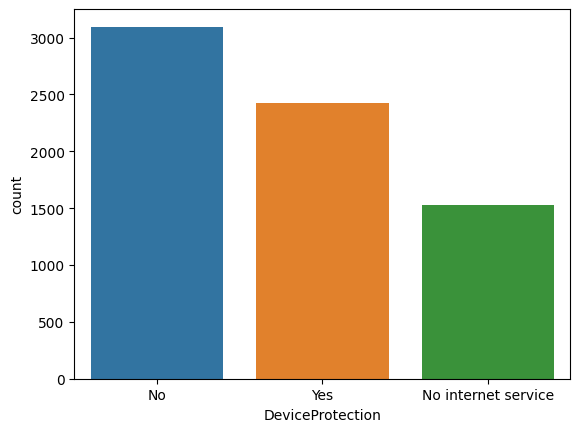

##########################################
                     TechSupport  Ratio
No                          3473  49.31
Yes                         2044  29.02
No internet service         1526  21.67
##########################################


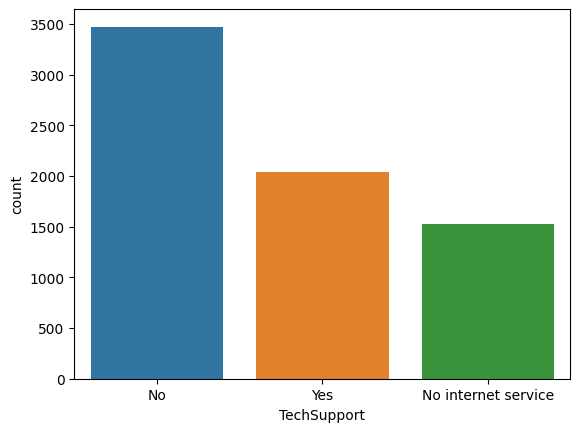

##########################################
                     StreamingTV  Ratio
No                          2810  39.90
Yes                         2707  38.44
No internet service         1526  21.67
##########################################


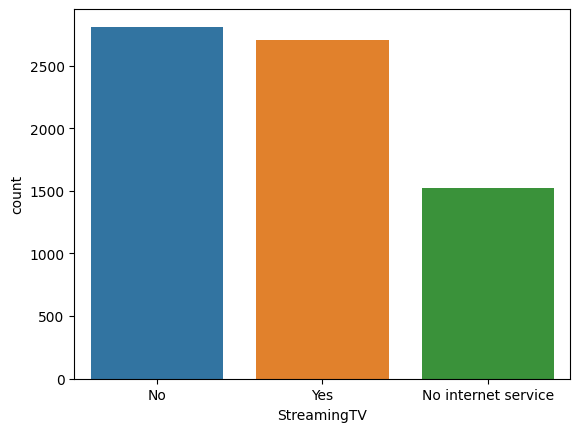

##########################################
                     StreamingMovies  Ratio
No                              2785  39.54
Yes                             2732  38.79
No internet service             1526  21.67
##########################################


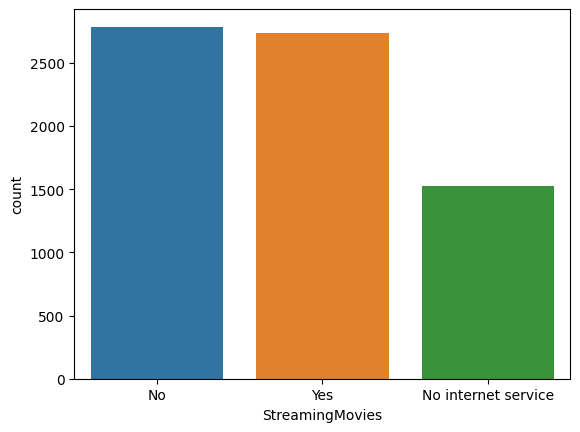

##########################################
                Contract  Ratio
Month-to-month      3875  55.02
Two year            1695  24.07
One year            1473  20.91
##########################################


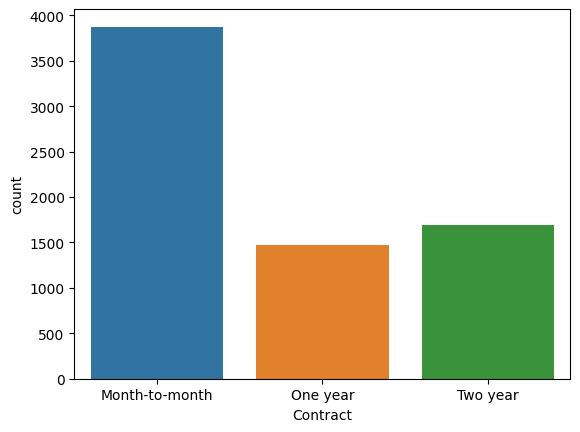

##########################################
     PaperlessBilling  Ratio
Yes              4171  59.22
No               2872  40.78
##########################################


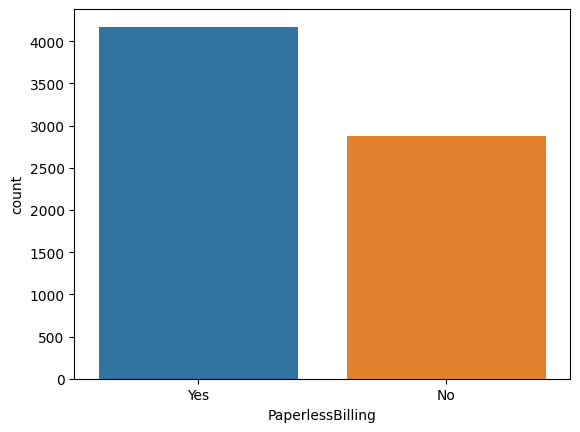

##########################################
                           PaymentMethod  Ratio
Electronic check                    2365  33.58
Mailed check                        1612  22.89
Bank transfer (automatic)           1544  21.92
Credit card (automatic)             1522  21.61
##########################################


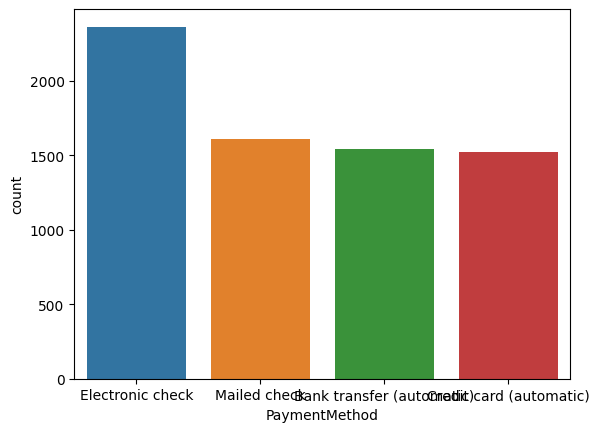

##########################################
     Churn  Ratio
No    5174  73.46
Yes   1869  26.54
##########################################


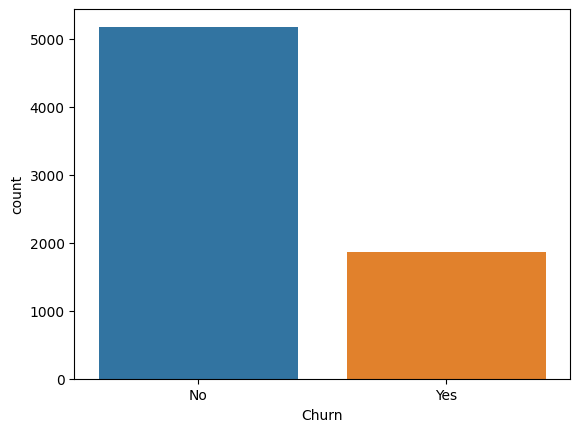

##########################################
   SeniorCitizen  Ratio
0           5901  83.79
1           1142  16.21
##########################################


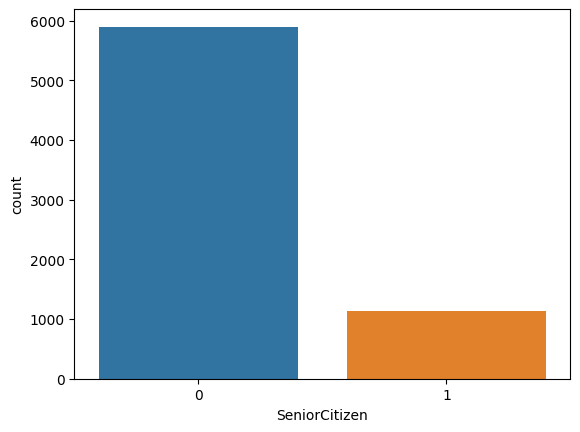

##########################################


In [139]:
# Analysis of Categorical Variables:
def cat_summary(df, col_name, plot=False):
   print(pd.DataFrame({col_name: df[col_name].value_counts(),
                         "Ratio": 100 * df[col_name].value_counts() / len(df)}))
   print("##########################################")
   if plot:
         sns.countplot(x=df[col_name], data=df)
         plt.show(block=True)
   print("##########################################")


for i in cat_cols:
    cat_summary(df,i,plot=True)

    tenure  Ratio
1      613   8.70
72     362   5.14
2      238   3.38
3      200   2.84
4      176   2.50
71     170   2.41
5      133   1.89
7      131   1.86
8      123   1.75
70     119   1.69
9      119   1.69
12     117   1.66
10     116   1.65
6      110   1.56
13     109   1.55
68     100   1.42
11      99   1.41
15      99   1.41
67      98   1.39
18      97   1.38
##########################################


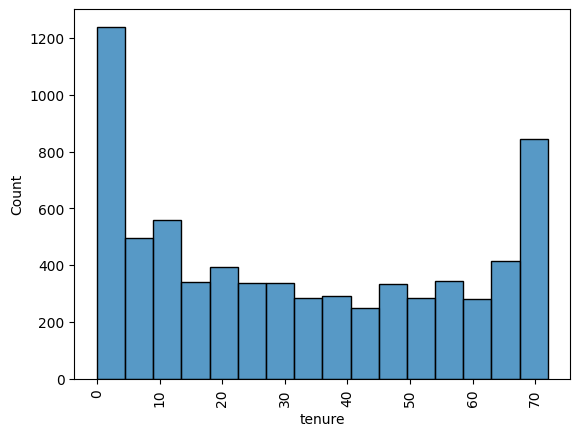

##########################################
       MonthlyCharges  Ratio
20.05              61   0.87
19.85              45   0.64
19.95              44   0.62
19.90              44   0.62
20.00              43   0.61
19.70              43   0.61
19.65              43   0.61
19.55              40   0.57
20.15              40   0.57
19.75              39   0.55
20.25              39   0.55
20.35              38   0.54
19.80              38   0.54
20.10              37   0.53
19.60              37   0.53
20.20              35   0.50
19.50              32   0.45
20.45              31   0.44
19.40              31   0.44
20.40              30   0.43
##########################################


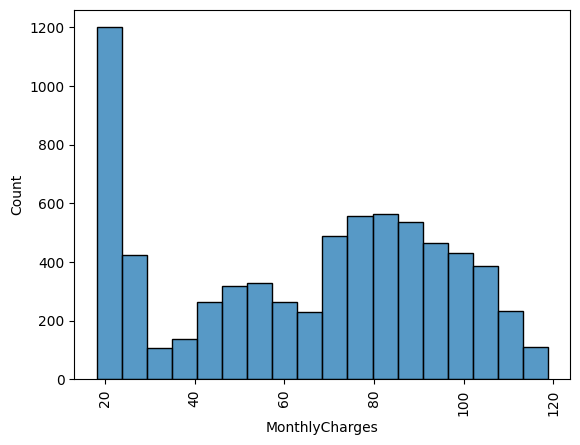

##########################################


In [140]:
# analysis of numerical variables

# numeric variables
def num_summary(df, col_name, plot=False):
   
   # ilk 20 gözlemi göster
   print(pd.DataFrame({col_name: df[col_name].value_counts().head(20),
                           "Ratio": 100 * df[col_name].value_counts().head(20) / len(df)}))
   print("##########################################")
   if plot:
         sns.histplot(x=df[col_name], data=df)
         plt.xticks(rotation=90)
         plt.show(block=True)
   print("##########################################")

for col in num_cols :
    num_summary(df,col,plot=True)

In [141]:
# Outlier Analysis

for i in num_cols:
    fig=px.box(df,y=i,color="Churn",template="plotly_dark",title=i)
    fig.show()
    

In [142]:
# outlier detection function:

# outlier threshold function:
def outlier_thresholds(dataframe,col_name,q1=0.25,q3=0.75):
    q1=dataframe[col_name].quantile(q1)
    q3=dataframe[col_name].quantile(q3)
    IQR=q3-q1
    
    up_limit=q3+1.5*IQR
    low_limit=q1-1.5*IQR
    
    return low_limit,up_limit


# check outliers function:
def check_outliers(dataframe,col_name):
    low_limit,up_limit=outlier_thresholds(dataframe,col_name)
    if dataframe[(dataframe[col_name]<low_limit) | (dataframe[col_name]>up_limit)].any(axis=None):
        return True 
   
    else:
        return False

for col in num_cols:
    print(col,check_outliers(df,col))

tenure False
MonthlyCharges False


In [143]:
# aykırı değerlere erişmek için:

def grab_outliers(dataframe,cols, index=False):

    low, up = outlier_thresholds(dataframe, cols)
    
    if dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].shape[0] > 10:
        print(dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].head(5))
        
    else:
        print(dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)])
        
    if index:
        outlier_index = dataframe[(dataframe[cols] < low) | (dataframe[cols] > up)].index
        return outlier_index
    
    

for col in num_cols:
    grab_outliers(df,col,index=True)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []


In [144]:
# There is no outliers in numerical variables.

In [145]:
# Missing Values Analysis

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [146]:
# show the missing values in dataset with ratio
def missing_values_tabl(df):
    
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio,2)], axis=1, keys=['n_miss', 'ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

missing_values_tabl(df)

,n_miss,ratio


In [147]:
# There is no missing values in dataset.

Text(0.5, 1.0, 'Correlation Between Features')

<Figure size 2000x1000 with 0 Axes>

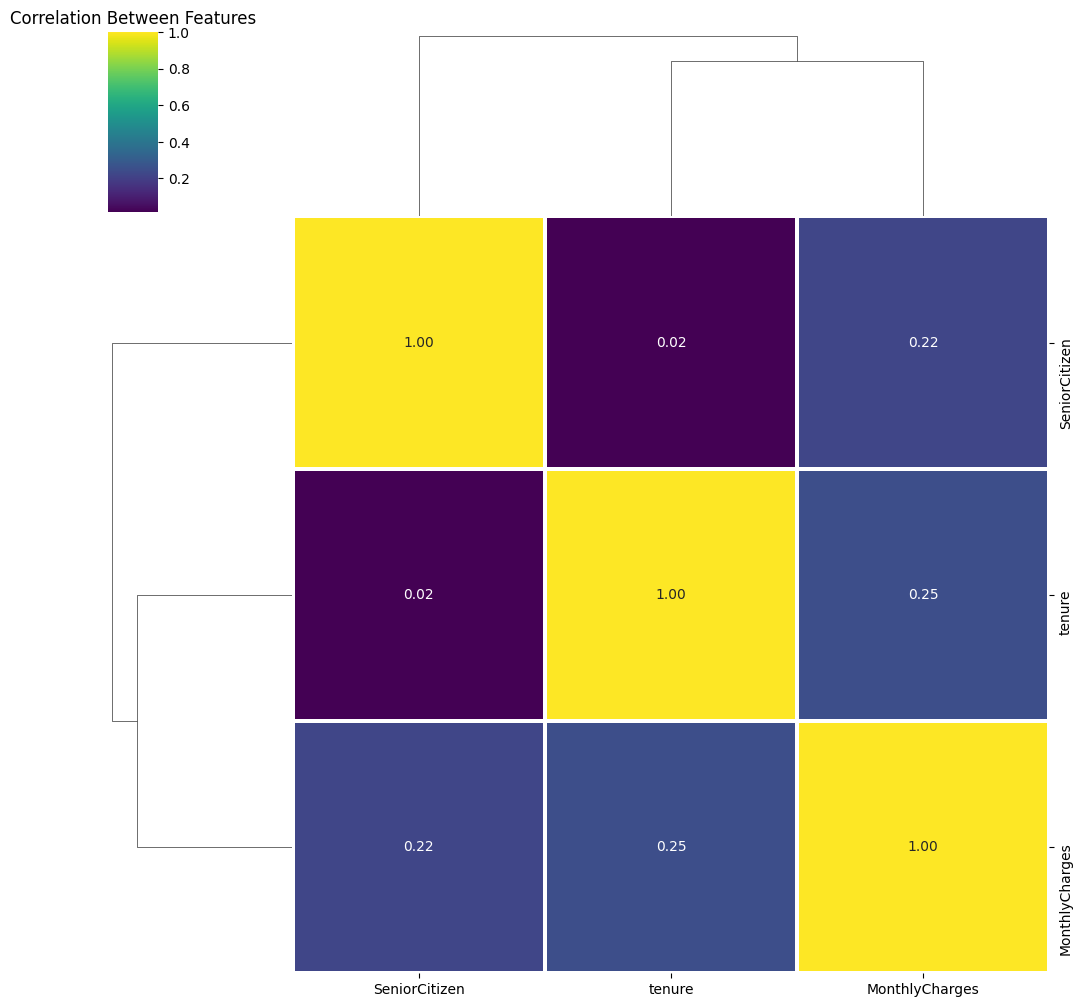

In [148]:
# Correlation Analysis

corr=df.corr()
plt.figure(figsize=(20,10))
sns.clustermap(corr,fmt=".2f",cmap="viridis",annot=True,linewidths=1.5,)
plt.title("Correlation Between Features")

In [149]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
# FEATURE ENGINEERING:

features=df.drop(["Churn","customerID"],axis=1) 

# show the features that have 0 values
for i in features:
    print(i+":",df[df[i]==0][i].count())

gender: 0
SeniorCitizen: 5901
Partner: 0
Dependents: 0
tenure: 11
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0


In [151]:
# fill the 0 values with np.nan for tenure variable
df["tenure"]=df["tenure"].replace(0,np.nan)
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
dtype: int64

In [152]:
# filling the missing values with Machine Learning Algorithms

df.dropna(inplace=True)
df.isnull().sum()  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [153]:
# FEATURE EXTRACTION:


for i in df.columns:    
    print(df[i].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1. 34.  2. 45.  8. 22. 10. 28. 62. 13. 16. 58. 49. 25. 69. 52. 71. 21.
 12. 30. 47. 72. 17. 27.  5. 46. 11. 70. 63. 43. 15. 60. 18. 66.  9.  3.
 31. 50. 64. 56.  7. 42. 35. 48. 29. 65. 38. 68. 32. 55. 37. 36. 41.  6.
  4. 33. 67. 23. 57. 61. 14. 20. 53. 40. 59. 24. 44. 19. 54. 51. 26. 39.]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [154]:
# label encoding for binary variables

def label_encoder(df, column_name):
    if df[column_name].dtype == 'object':
        if df[column_name].nunique() <= 2:
            le = LabelEncoder()
            df[column_name] = le.fit_transform(df[column_name])
            return df
        elif df[column_name].nunique() > 2  and df[column_name].nunique() <= 10:
            ohe = OneHotEncoder()
            ohe_df = pd.DataFrame(ohe.fit_transform(df[[column_name]]).toarray())
            ohe_df.columns = [column_name + "_" + str(i) for i in ohe_df.columns]
            df = df.join(ohe_df)
            df = df.drop(column_name, axis=1)
            return df
        else:
            return df
        
    else:
        return df
    
    
for i in df.columns:
    df = label_encoder(df, i)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,7590-VHVEG,0,0,1,0,1.00,0,1,29.85,29.85,0,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,5575-GNVDE,1,0,0,0,34.00,1,0,56.95,1889.5,0,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,3668-QPYBK,1,0,0,0,2.00,1,1,53.85,108.15,1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3,7795-CFOCW,1,0,0,0,45.00,0,0,42.30,1840.75,0,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00
4,9237-HQITU,0,0,0,0,2.00,1,1,70.70,151.65,1,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


In [155]:
# object to numeric variables
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

X=df.drop(["Churn","customerID"],axis=1).values
y=df["Churn"].values.reshape(-1,1)


In [169]:
# scaling the data

rb=RobustScaler()
X=rb.fit_transform(X)

# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

# removing nan values
for i in [X_train,X_test,y_train,y_test]:
    np.nan_to_num(i, copy=False)

In [170]:
np.argwhere(np.isnan(X_train)).size

0

In [173]:
# Model building:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


# MODELING:

knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]
overral=pd.DataFrame(columns=["Model","Accuracy Score","F1 Score","ROC AUC Score","R2 Score",
                             "RMSE","MAE","MSE","precision_score","recall_score"])
for model in models:
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    roc=roc_auc_score(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    pr=precision_score(y_test,y_pred)
    rc=recall_score(y_test,y_pred)
    
    overral=overral.append({"Model":model.__class__.__name__,
                            "Accuracy Score":acc,
                            "F1 Score":f1,
                            "ROC AUC Score":roc,
                            "R2 Score":r2,
                            "RMSE":rmse,
                            "MAE":mae,
                            "MSE":mse,
                            "precision_score":pr,
                            "recall_score":rc},ignore_index=True)
    

overral=overral.sort_values(by="Accuracy Score",ascending=False)
overral=overral.style.background_gradient(cmap="viridis")
overral

,Model,Accuracy Score,F1 Score,ROC AUC Score,R2 Score,RMSE,MAE,MSE,precision_score,recall_score
9,LogisticRegression,0.788202,0.540123,0.686039,-0.085272,0.460215,0.211798,0.211798,0.638686,0.467914
1,SVC,0.787491,0.512235,0.670203,-0.088913,0.460987,0.212509,0.212509,0.656904,0.419786
7,GradientBoostingClassifier,0.786070,0.543247,0.687998,-0.096197,0.462526,0.213930,0.213930,0.628070,0.478610
6,LGBMClassifier,0.783937,0.543544,0.688252,-0.107123,0.464825,0.216063,0.216063,0.619863,0.483957
8,AdaBoostClassifier,0.780384,0.531108,0.680714,-0.125332,0.468632,0.219616,0.219616,0.614035,0.467914
4,RandomForestClassifier,0.777541,0.500797,0.663426,-0.139899,0.471656,0.222459,0.222459,0.620553,0.419786
5,XGBClassifier,0.769723,0.522124,0.675160,-0.179960,0.479872,0.230277,0.230277,0.582237,0.473262
2,GaussianNB,0.751244,0.552430,0.695837,-0.274648,0.498755,0.248756,0.248756,0.529412,0.577540
0,KNeighborsClassifier,0.743426,0.418680,0.617166,-0.314708,0.506532,0.256574,0.256574,0.526316,0.347594
3,DecisionTreeClassifier,0.721393,0.458564,0.632864,-0.427606,0.527832,0.278607,0.278607,0.474286,0.443850
